In [1]:
import ROOT
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Welcome to JupyROOT 6.22/06


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-w5g5ptme because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


array([[<AxesSubplot:title={'center':'fcupgated_33ms'}>]], dtype=object)

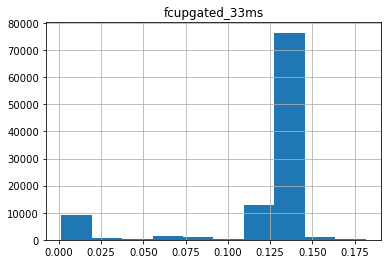

In [18]:
df=pd.read_csv("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc-scaler/run16767_HELScaler-all.csv")
df[(df.clockgated_33ms>30000)].hist("fcupgated_33ms")

# September 17th Cross Check

In [48]:
dfN = pd.read_csv("/work/clas12/pilleux/beamCharge_16292_16771.txt",sep='\t')
dfG = pd.read_csv("/work/clas12/users/gmat/CLAS12Analysis/util/runHelicityCounts.csv",sep=',')
dfG= dfG.sort_values("Run")
dfG = dfG.loc[dfG.fcup_pos!=0]
dfG = dfG[dfG.Run.isin(dfN.run)]
dfG = dfG.reset_index()

<AxesSubplot:xlabel='Run'>

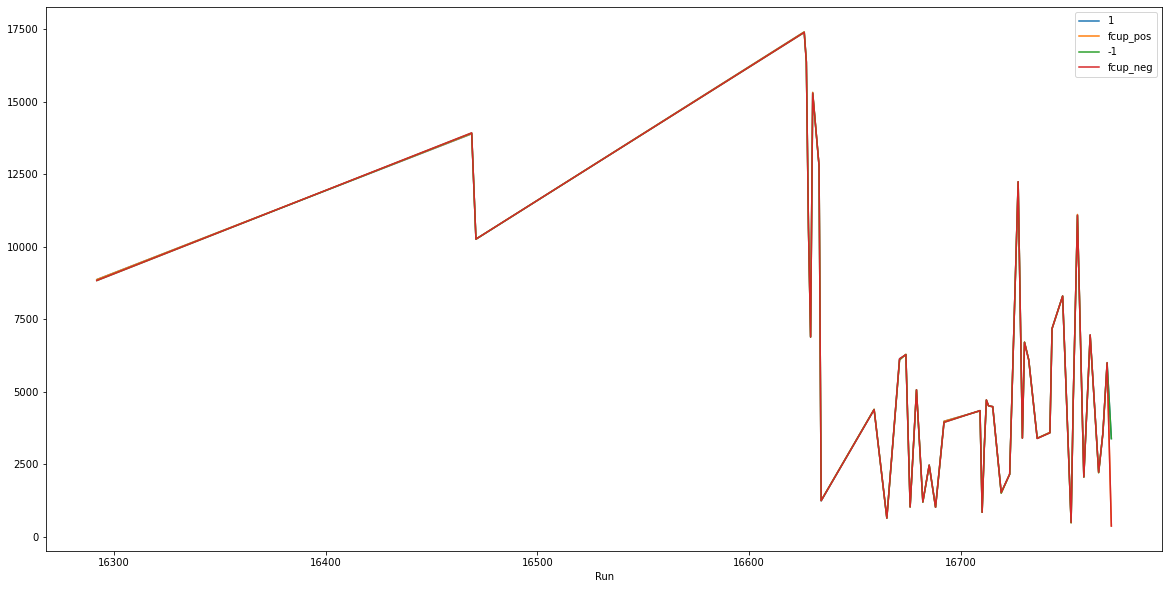

In [33]:
fig,axs = plt.subplots(1,1,figsize=(20,10))
dfN.plot(x="run",y="1",ax=axs)
dfG.plot(x="Run",y="fcup_pos",ax=axs)
dfN.plot(x="run",y="-1",ax=axs)
dfG.plot(x="Run",y="fcup_neg",ax=axs)

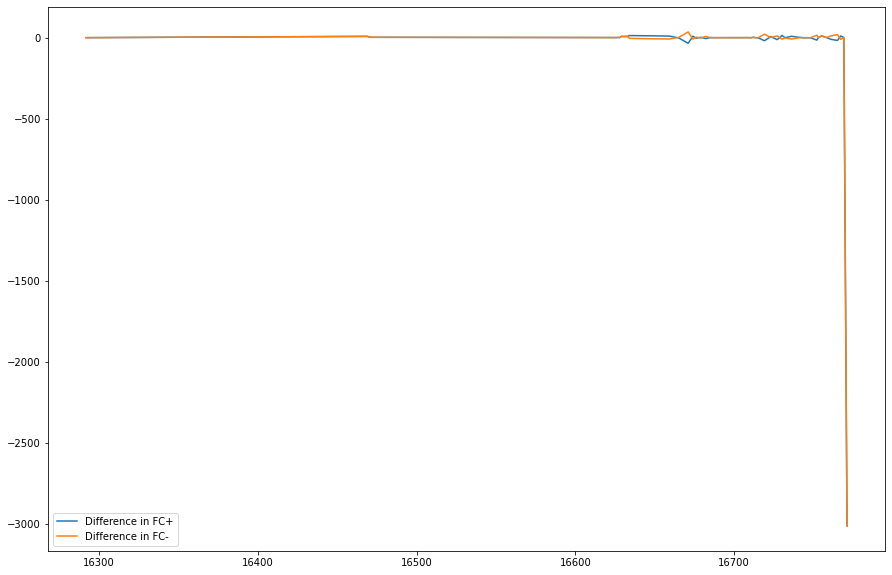

In [53]:
fig,axs = plt.subplots(1,1,figsize=(15,10))
axs.plot(dfG["Run"],dfG["fcup_pos"]-dfN["1"],label="Difference in FC+")
axs.plot(dfG["Run"],dfG["fcup_neg"]-dfN["-1"],label="Difference in FC-")
axs.legend()

# September 28th Cross Check

In [17]:
# Get all target polarizations from RCDB
import sys
sys.path.append("/work/clas12/users/gmat/packages/clas12root/rcdb/python/")
import rcdb
from rcdb.provider import RCDBProvider
from rcdb.model import ConditionType
from scipy.optimize import curve_fit
db = RCDBProvider("mysql://rcdb@clasdb/rcdb")
from os.path import exists
import matplotlib.pyplot as plt

In [7]:
def get_from_rcdb(run,param):
    r = db.get_run(run)
    cnd = r.get_condition(param)
    return cnd.value

In [9]:
def get_csv_all(filepath, run):
    return filepath + "run{}_RUNScaler-all.csv".format(run) , filepath + "run{}_HELScaler-all.csv".format(run)

In [58]:
runMin = 16000
runMax = 18000
filepath = "/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc-scaler/"
r=[]
n=[]
fcup=[]
fcupcorr=[]
fcmin=[]
fcmax=[]
for run in np.arange(runMin,runMax+1):
        # Get CSV scalers
        csvRUNall, csvHELall = get_csv_all(filepath,run)
        if(not exists(csvRUNall)):
            continue
        
        # Get event count
        evtcount = get_from_rcdb(run,"event_count")
        
        # Get dataframe
        df_RUN = pd.read_csv(csvRUNall)
        df_HEL = pd.read_csv(csvHELall)
        # Get fcup accumulated
        fcup_acc = df_RUN.fcup.sum()
        fcup_acc_corr = df_RUN[df_RUN.fcup>0].fcup.sum()
        
        # Append arrays
        r.append(run)
        n.append(evtcount)
        fcup.append(fcup_acc)
        fcupcorr.append(fcup_acc_corr)
        fcmin.append(df_RUN.fcup.min())
        fcmax.append(df_RUN.fcup.max())
        
        
        

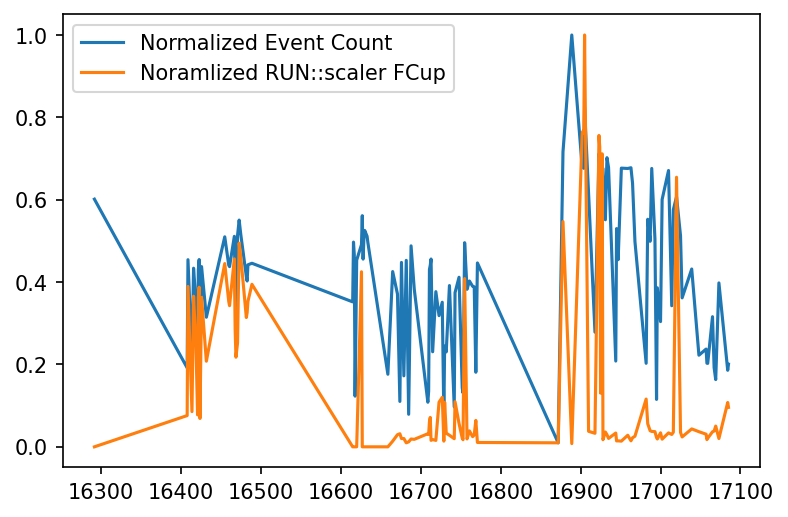

In [61]:
plt.figure(dpi=150)
plt.plot(r,n/np.amax(n),label="Normalized Event Count")
plt.plot(r,fcupcorr/np.amax(fcupcorr),label="Noramlized RUN::scaler FCup")
plt.legend()

Text(0, 0.5, 'RUN::scaler total FCup')

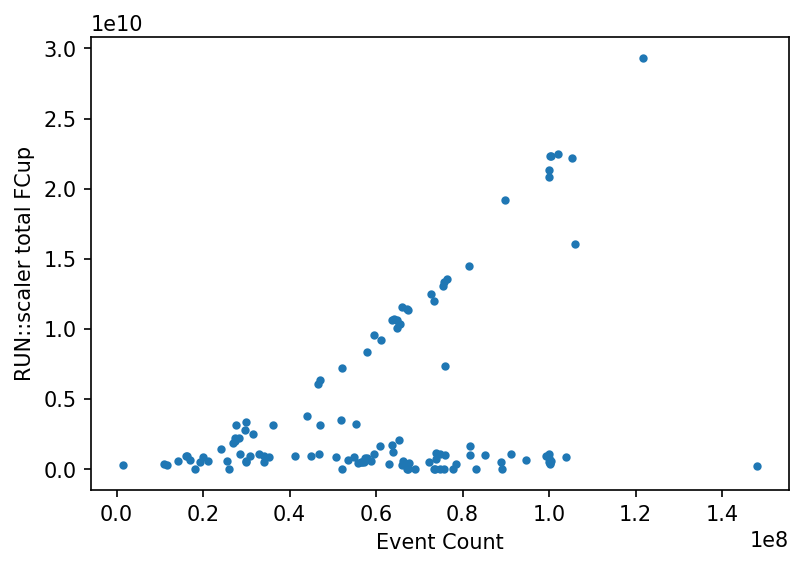

In [62]:
plt.figure(dpi=150)
plt.plot(n,fcup,".")
plt.xlabel("Event Count")
plt.ylabel("RUN::scaler total FCup")